# Liverpool Assignment
- Installing Packages
- Preparing and Exploring the Dataset
- Unsupervised Learning
- Supervised Learning

## Installing packages

In [168]:
#tells matplotlib to use the inline backend which renders the graphs in the notebook

%matplotlib inline 

#imports the packages needed and renames some for convenience 

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed

import prince
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler


## Importing the dataset

For this assignment I used the "Student Performance Data Set" from the UCI Machine Learning archive (https://archive.ics.uci.edu/ml/datasets/student+performance#).

This is two datasets on educational performance at two schools in Portugal.

The first dataset is on performance in maths (n = 395), the second is on performance in Portugese (n = 649). 

Whilst students in the first dataset *seem* to be present in the second dataset, the data appears to be have been gathered at different times in the year and for a small number of students certain attributes have changed which makes a join of the datasets of questionable validity.

I will therefore focus on the larger portugese acheivement dataset, I will however investigate whether the predictors of sucess are similar for maths and portugese. In particular I will look at whether being sucessful maths predicts sucess in portugese. 


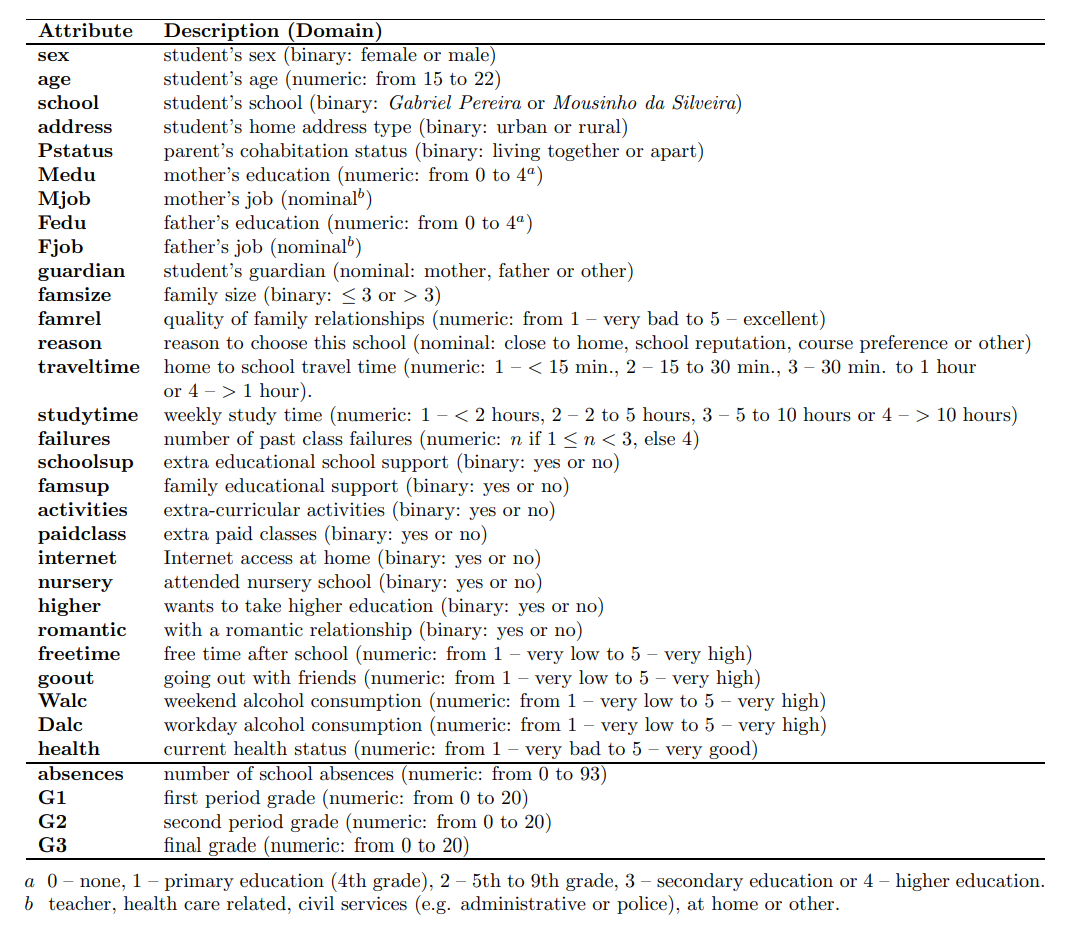

In [169]:
Image("../Liverpool Assignment/Attribute_table.png")

In [170]:
#uses read_csv from pandas to import read in the csv file
db_port = pd.read_csv("../Liverpool Assignment/Data/student-por.csv", sep = ";", header = 0)

#uses pandas' describe function to provide descriptive statistics on our variables, categorical variables are included by setting the 'include' to 'all'. 
db_port.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649,NaN,NaN,NaN,16.7442,1.21814,15,16,17,18,22
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649,NaN,NaN,NaN,2.51464,1.13455,0,2,2,4,4
Fedu,649,NaN,NaN,NaN,2.30663,1.09993,0,1,2,3,4
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Exploring the dataset

Visually inspecting the table above, some outliers stand out. 
For example whilst the average age is ~16.7, however the maximum age is 22

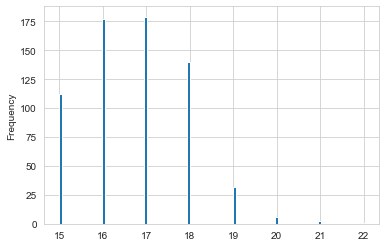

In [171]:
db_port["age"].plot.hist(bins=100) #plots a histogram with 100 bins of the frequncency of the values of the variable age from the data frame db_port

We can see that most students are between 15 and 19, however the number of students who are 20 and older in unclear from this plot, so we can instead use value_counts from pandas to return a table  

In [172]:
db_port["age"].value_counts(ascending = True) #provides a table of the 

22      1
21      2
20      6
19     32
15    112
18    140
16    177
17    179
Name: age, dtype: int64

In [173]:
db_port.query("age > 19")\
        [["age", "G3", "failures", "absences", "health"]]

,age,G3,failures,absences,health
279,22,5,3,12,1
299,20,12,0,8,2
351,20,15,2,0,5
407,21,12,2,0,5
413,21,10,2,21,4
414,20,15,0,8,3
421,20,10,1,5,5
506,20,10,1,8,3
574,20,10,1,12,4


In [174]:
#queries the database for individuals of age 20 and 21
#specifies that it is the G3 variable that should be extracted
#calculates the mean
db_port.query("22 > age > 19")\
        ["G3"]\
        .mean() 

11.75

We can see here that the only 22 year old has very bad health, a high number of absences, and poor grades.
The other older students have grades within a stadard deviation of the average (11.9).


We can also explore other relationships within the data by creating new variables, for example G3 is the students final grades and G1 is the students first period grade, a new variable calculated as G1 - G3 could provide insight into how much a student has improved over the year, which we can then compare to variables such as whether the student had received extra paid classes.

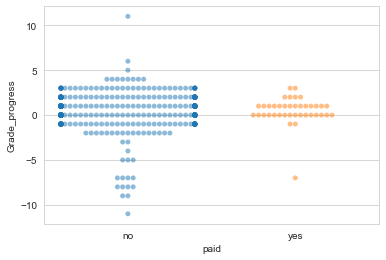

In [177]:
db_port2 = db_port.assign(Grade_progress = lambda x: db_port['G3']
                                                -db_port['G1'])

sns.set_style("whitegrid")           #this sets the aesthetic of seaborne plots to whitegrid, which provides a handy line for y = 0
sns.swarmplot(x = "paid",            #calls the swarmplot function from the seaborne package, defines the x axis as the paid variable
              y = "Grade_progress",  #defines the y axis as grade progress
               data = db_port2,      #tells the package what 
              alpha=0.5
             );

We can see from this plot that most students improve their scores over the year, and that students who received extra paid classes are less likely to see their grades drop throughout the year.

## Unsupervised learning

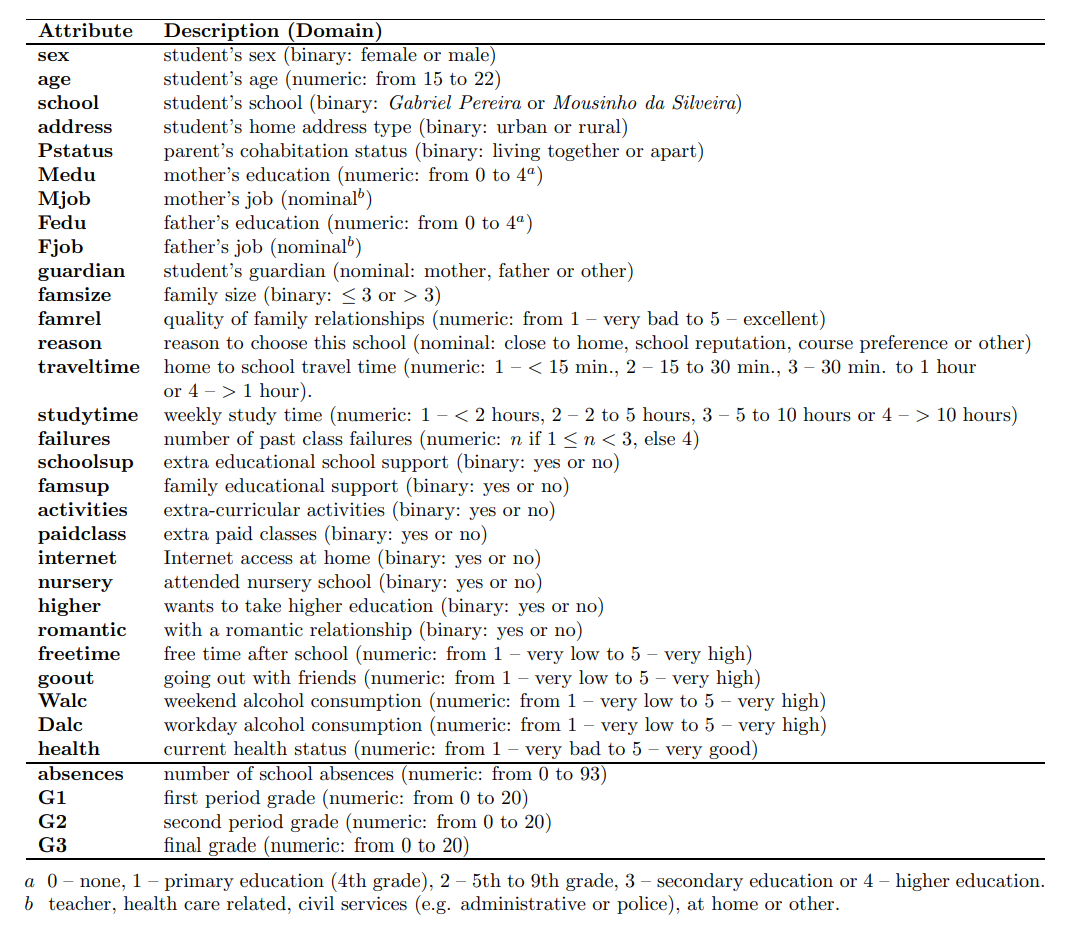

In [178]:
Image("../Liverpool Assignment/Attribute_table.png")

We can see from looking at the above that many of the variables could potentially outline groupsings. 

For example some variables seem to relate directly to the students home and family situation ('address','famsize','Pstatus', 'famrel', 'Medu', 'Fedu','Mjob', 'Fjob', 'guardian', 'famsup', 'internet', 'traveltime'). It could be fruitfull to apply a clustering algorythm to these variables to test if there are meaningfull groupings of home situations and explore whether these impact outcomes such as grades and absesnces. However of these variables only 4 are numeric ('Medu', 'Fedu' 'famrel','traveltime').

Given that most of our data is not numeric, we can take two approaches here:
 - Fitting k-means models on all the numerical variables.
 - Using Factor Analysis with Mixed Data (Pagès, 2002) to include all the dependant variables in our dataset.
 

In [341]:
#Creating scaled arrays for all the numerical variables
Num_variables = ['Medu', 'Fedu', 'famrel','traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

db_portnum = scale(db_port.filter(Num_variables))

db_portstd = pd.DataFrame(db_portnum, 
                 index = db_port.index,
                 columns = Num_variables
                )


- Fitting a KMeans clustering with 5 clusters on our *unscaled* data.

In [342]:
seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

estimator = KMeans(n_clusters = 5) #creating an KMeans estimator with 5 clusters

estimator.fit(db_port.filter(Num_variables)) #computes kmean clustering for the numerical variables

k5_raw = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above


- Fitting a KMeans clustering with 5 clusters on our *scaled* data.

In [343]:

estimator.fit(db_portstd) #computes kmean clustering for the scales values of the numerical variables

k5_std = pd.Series(estimator.labels_, index=db_port.index) #creates a dataframe from the output of the line above

- We can also fit a principle componant analysis model, this allows us to project our data into 2 dimensions allowing us new ways of fitting our kmeans clustering algorythm and giving us the ability to visualise our other clusterings.

In [344]:
components = pca_estimator.fit_transform(db_port.filter(Num_variables))

components = pd.DataFrame(components,
                              index = db_port.index,
                              columns = ["C-1", "C-2"]
                             )

estimator.fit(components)

k5_pca = pd.Series(estimator.labels_,
                       index=components.index
                      )

- We can compare these models visually to see if they are similar.

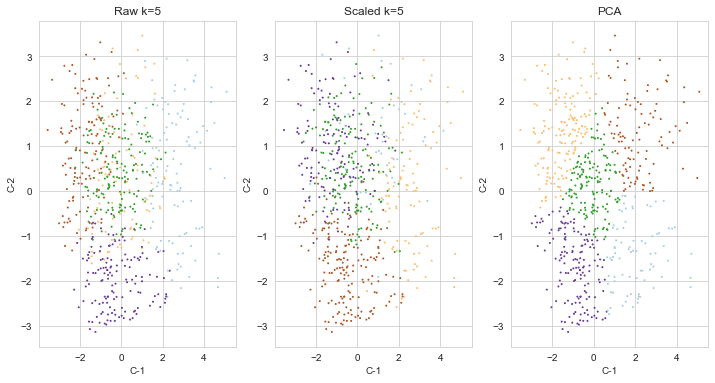

In [359]:
f, axs = plt.subplots(1, 3, figsize=(12, 6))

ax = axs[0]

components.assign(labels=k5_raw)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw k=5")         

ax = axs[1]

components.assign(labels=k5_std)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Scaled k=5")    
             
ax = axs[2]

components.assign(labels=k5_pca)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("PCA")   
             
plt.show()

Worrying, these aren't very similar. The Pca seems to have the more distinct groups, and the scaled data seems to fare better than the raw data.

We can instead try to use to factor analysis using mixed data model to include **all** our variables. This method applies a multiple corespondence analysis style approach to cathegorical variables, and 

- Fitting a Fator Analysis with Mixed Data using Max Halford's "Prince" package (https://github.com/MaxHalford/prince)

In [346]:
db_port_pred = db_port.drop(columns=['absences', 'G1', 'G2', 'G3']) #first we create a new dataframe without the dependant variables (grades and absenses)

seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

famd_estimator = prince.FAMD(    
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=None,
    engine='auto',
)

famd_estimator = famd_estimator.fit(db_port_pred) 

componentsmfa = pd.DataFrame(famd_estimator.transform(db_port_pred), index = db_port_pred.index)

componentsmfa.columns = ["C-1", "C-2"] #this renames the columns, when I try to do this as part of the previous line my computer crashes, I do not understand this.

estimator.fit(componentsmfa)

k5_famd = pd.Series(estimator.labels_,
                       index=componentsmfa.index
                      )


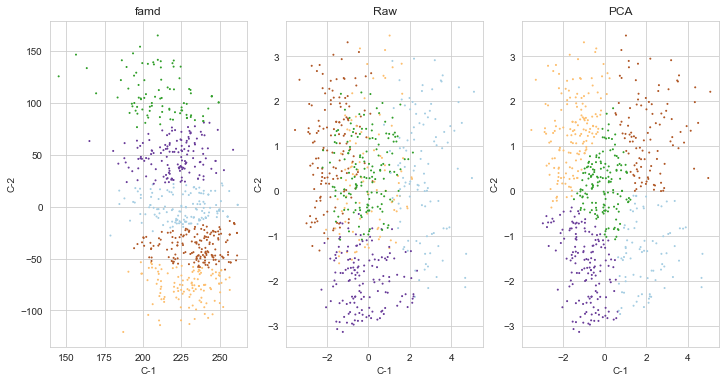

In [347]:
f, axs = plt.subplots(1, 3, figsize=(12, 6))

ax = axs[0]
componentsmfa.assign(labels=k5_famd)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("famd")

ax = axs[1]
components.assign(labels=k5_raw)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("Raw")

ax = axs[2]
components.assign(labels=k5_pca)\
          .plot.scatter("C-1", 
                        "C-2",
                        c="labels",
                        s=1,
                        cmap="Paired",
                        colorbar=False,
                        ax=ax
                       )
ax.set_title("PCA")

plt.show()

- Evaluating our clustering models using the Calinski and Harabasz score

The first non-visual way in which we can evaluate our models is using the Calinski and Harabasz score or Variance Ratio Criterion. This metric calculates the ratio of dispersion within clusters and between clusters. Unfortunately we cannot use Calinski and Harabasz for the FAMD results as this metric relies on caluclating geometric distances between points which is not meaningfull for a mix of categorical and numerical data. 

In [348]:
chs_raw = calinski_harabasz_score(db_port.filter(Num_variables), k5_raw)

chs_std = calinski_harabasz_score(db_port.filter(Num_variables), k5_std)

chs_pca = calinski_harabasz_score(db_port.filter(Num_variables), k5_pca)


In [349]:
pd.Series({"Raw": chs_raw,
               "Standardised": chs_std,
               "PCA": chs_pca,
              })

Raw             91.843574
Standardised    68.602010
PCA             71.166678
dtype: float64

The KMeans clustering on the unscaled variables is the best score according to this metric.

We can try to optimise the number of clusters in this fit by calculating the Calinski and Harabasz score for a number of values of k. We then plot the reulsts against the number of clusters in what is known as an elbow plot.

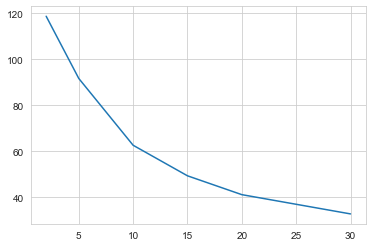

In [350]:
seed(12345)

chss = {}    #create an empty dict
for i in [2, 5, 10, 15, 20, 30]:
    estimator = KMeans(n_clusters=i)
    estimator.fit(db_port.filter(Num_variables))
    chs = calinski_harabasz_score(db_port.filter(Num_variables),
                                  estimator.labels_
                                 )
    chss[i] = chs
chss = pd.Series(chss)

chss.plot.line()

It appears that running out model with k = 10 will provide us with the best clustering.

In [351]:
seed(54321) # manually setting the seed for random processes to ensure our results can be reproduced

estimator10 = KMeans(n_clusters = 10) #creating an KMeans estimator with 10 clusters

estimator10.fit(db_port.filter(Num_variables)) #computes kmean clustering for the numerical variables

k10_raw = pd.Series(estimator10.labels_, index=db_port.index)

Another way we can asses the quality of our clustering is using silhouette scores.

- Evaluating our clustering models using Silhouette Scores

In [352]:
sil_raw10 = silhouette_score(db_port.filter(Num_variables), k10_raw,
                           metric="euclidean"
                          )
sil_raw5 = silhouette_score(db_port.filter(Num_variables), k5_raw,
                           metric="euclidean"
                          )
sil_std = silhouette_score(db_port.filter(Num_variables), k5_std,
                           metric="euclidean"
                          )
sil_pca = silhouette_score(db_port.filter(Num_variables), k5_pca,
                           metric="euclidean"
                          )

pd.Series({"Raw k=5": sil_raw5,
           "Raw k=10": sil_raw10,
               "Standardised": sil_std,
               "PCA": sil_pca,
              })

Raw k=5         0.126987
Raw k=10        0.111336
Standardised    0.104192
PCA             0.092366
dtype: float64

Silhouette scores are bound between 1 and -1 with scores close to zero indicating that there is a high level of overlap between our clusters. 
We can see that of the 5 cluster models the k means on the raw data fares the best (though not by much). Interestingly the ten-cluster k means on the raw data is slightly worse than the five-cluster k means, contrary to what our elbow plot would have suggested.


- Exploring our clusterings internally.

In [370]:
g = db_port.filter(Num_variables).groupby(k5_std)

g.mean() #creates a table with the mean value of each variable for each cluster

,Medu,Fedu,famrel,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health
0,1.673913,1.565217,3.978261,1.934783,1.478261,1.934783,3.782609,3.652174,1.760870,2.717391,3.847826
1,2.143713,1.856287,4.359281,1.377246,2.071856,0.053892,3.658683,3.616766,1.137725,1.832335,3.107784
2,2.622642,2.462264,3.773585,1.716981,1.660377,0.141509,3.613208,4.113208,2.933962,4.179245,3.952830
3,1.711409,1.557047,3.442953,1.865772,1.885906,0.174497,2.369128,2.275168,1.221477,1.818792,3.322148
4,3.668508,3.436464,4.016575,1.320442,2.110497,0.027624,3.000000,2.872928,1.165746,1.850829,3.784530


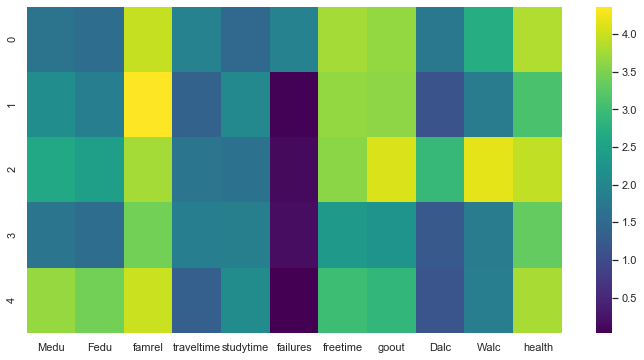

In [368]:
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(g.mean(), cmap='viridis')

As expected from the results of the silhouette scores there is much overlap between our clusters. 

Cluster 0 is notable for having particularily high average amounts of past failures as well as the lowest levels of average parental education, and studytime. Students from this cluster go out with friends more and have the most freetime on average,and have the second higest level of both weekend and weektime alcohol comsumption.

Cluster 3 have massively higher levels of alcohol consumption compared to other groups
In contrast cluster 4 ...

- Characterising our clusterings externally.

In [380]:

db_port.groupby(k5_std)["absences", "G3"].mean()

<ipython-input-380-a77408d6ca26>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  db_port.groupby(k5_std)["absences", "G3"].mean()


,absences,G3
0,4.826087,8.586957
1,3.269461,12.287425
2,5.094340,10.726415
3,3.536913,11.362416
4,2.983425,13.535912


As expected from looking at our clustering internally, group 0 has the worst outcome in terms of final grade.


blab bla 

However group three also has low parental education